<a href="https://colab.research.google.com/github/LeoFernanndes/portfolio/blob/master/ChicagoTaxiRidePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

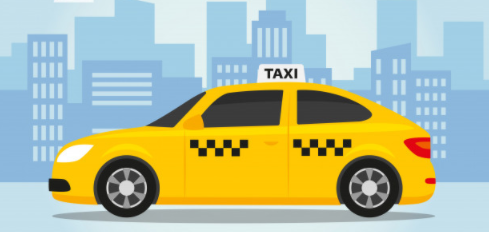

# Chicago Taxi Ride Price Regression

In [1]:
import pandas as pd


pd.options.display.max_rows = 50

url = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/chicago_taxi_sample_50k.csv'
df_taxi = pd.read_csv(url)

df_baseline = df_taxi.copy()
df_baseline

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,ride_date
0,d3c594ba6b3eb5f9644b9af3f1328aa82744ffd5,a0ac953f8cee6f14d8f2f15bf14b52de5caab289f7d599...,2019-09-13 23:00:00+00:00,2019-09-13 23:00:00+00:00,60.0,0.0,NaN,NaN,7.0,7.0,3.25,0.00,0.0,0.0,3.25,Cash,Taxi Affiliation Services,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),2019-09-13
1,cac1926e5b4ca977decbf9079ffd4b02cae90503,b5e2695a2f44b9bce7a0a86148ac418802f0067be1f6d4...,2014-06-19 18:00:00+00:00,2014-06-19 18:15:00+00:00,840.0,2.3,NaN,NaN,24.0,8.0,9.85,2.00,0.0,0.0,11.85,Credit Card,NaN,41.901207,-87.676356,POINT (-87.6763559892 41.90120699410001),41.899602,-87.633308,POINT (-87.6333080367 41.899602111),2014-06-19
2,ab1adf76a077d31a82824264aed032f197423f5d,41afbb1073e9c58a6dbdfff8ad24160d01c862ca34c520...,2018-08-24 16:00:00+00:00,2018-08-24 16:45:00+00:00,3180.0,0.9,1.703198e+10,1.703108e+10,76.0,8.0,41.00,9.20,0.0,5.0,55.20,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.907413,-87.640902,POINT (-87.6409015248 41.9074128162),2018-08-24
3,d19b9b5131a749b6c8fee6661a84833421c1e25f,6daab772b2fe0e6dcb68884525d6ad9d44ce74ecaeb417...,2015-06-20 12:15:00+00:00,2015-06-20 12:30:00+00:00,540.0,2.9,1.703108e+10,1.703107e+10,8.0,7.0,9.44,2.00,0.0,0.0,11.44,Credit Card,NaN,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.929263,-87.635891,POINT (-87.6358909539 41.9292629902),2015-06-20
4,48262d526cc41442f947b81a3ab0f60174fc66cc,11f73b08790612efe341cf8cf69cadbcb7732293794186...,2018-08-10 21:00:00+00:00,2018-08-10 21:00:00+00:00,600.0,1.6,1.703128e+10,1.703108e+10,28.0,8.0,7.50,1.50,0.0,0.0,9.00,Credit Card,Choice Taxi Association,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),2018-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,a3a6c9af9051d48af2b7b2fbdf02c962fa9a9ca9,cc33cdc1816a9ba9822dd033062f8d414cac183bbfa7fc...,2014-06-20 13:00:00+00:00,2014-06-20 13:00:00+00:00,515.0,1.6,1.703108e+10,1.703128e+10,8.0,28.0,7.25,2.00,NaN,1.0,10.25,Credit Card,American United,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.879255,-87.642649,POINT (-87.642648998 41.8792550844),2014-06-20
49996,33b1fb15a4e0b417f8dcee508993db379abd0039,45bd8de07cb28a2d16874f8ba527f094fe8b68dceb5f59...,2014-06-30 14:30:00+00:00,2014-06-30 14:45:00+00:00,1140.0,1.0,NaN,NaN,69.0,69.0,10.45,0.00,0.0,1.0,11.45,Cash,Choice Taxi Association,41.763247,-87.616134,POINT (-87.6161341112 41.7632467988),41.763247,-87.616134,POINT (-87.6161341112 41.7632467988),2014-06-30
49997,cf5dbfda73e899b9889024b9ee51a97a4df72489,5c4dbf120a97d6d82d93388ef3ec44ea96fff151a5f179...,2014-09-20 01:45:00+00:00,2014-09-20 01:45:00+00:00,240.0,1.1,1.703183e+10,1.703107e+10,7.0,7.0,5.65,2.00,0.0,1.0,8.65,Credit Card,Choice Taxi Association,41.914747,-87.654007,POINT (-87.6540070286 41.9147473049),41.929047,-87.651311,POINT (-87.6513108767 41.9290469366),2014-09-20
49998,dbac35b3e6a4ac99f8c691aaf885abc2f43cb4ca,6682944f2b37609761181033253037c05fed4377e8b649...,2019-07-23 16:00:00+00:00,2019-07-23 16:30:00+00:00,1500.0,0.0,NaN,NaN,32.0,15.0,25.75,0.00,0.0,5.0,30.75,Cash,Star North Management LLC,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.954028,-87.763399,POINT (-87.7633990316 41.9540276487),2019-07-23


In [2]:
# verificando dados faltantes
df_baseline.isnull().sum().sort_values(ascending=False)

dropoff_census_tract      17429
pickup_census_tract       17213
company                    8719
tolls                      8428
dropoff_community_area     6799
dropoff_longitude          6662
dropoff_latitude           6662
dropoff_location           6662
pickup_community_area      5883
pickup_location            5878
pickup_longitude           5878
pickup_latitude            5878
trip_seconds                325
trip_end_timestamp            9
tips                          2
fare                          2
trip_total                    2
taxi_id                       2
extras                        2
trip_start_timestamp          0
ride_date                     0
trip_miles                    0
payment_type                  0
unique_key                    0
dtype: int64

Pra começar, vamos estabelecer o mínimo aceitável para um modelo de regressão nesse conjunto de dados. 

Pra isso, vamos preencher os dados faltantes com a mediana dos dados numéricos e a moda dos dados categóricos e treinar um modelo padrão. Esse processo é conhecido como a definição do modelo baseline.

In [3]:
df_baseline.dtypes

unique_key                 object
taxi_id                    object
trip_start_timestamp       object
trip_end_timestamp         object
trip_seconds              float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
pickup_community_area     float64
dropoff_community_area    float64
fare                      float64
tips                      float64
tolls                     float64
extras                    float64
trip_total                float64
payment_type               object
company                    object
pickup_latitude           float64
pickup_longitude          float64
pickup_location            object
dropoff_latitude          float64
dropoff_longitude         float64
dropoff_location           object
ride_date                  object
dtype: object

In [4]:
for column in df_baseline.columns:
  if df_baseline[column].dtype == 'object':
    df_baseline[column] = df_baseline[column].fillna(df_baseline[column].mode()[0]) # mode[0] porque em arrays multimodais, selecionamos apenas a primeira
  else:
    df_baseline[column] = df_baseline[column].fillna(df_baseline[column].median())

df_baseline.isnull().sum().sort_values(ascending=False) # nenhum dado faltante

ride_date                 0
dropoff_location          0
taxi_id                   0
trip_start_timestamp      0
trip_end_timestamp        0
trip_seconds              0
trip_miles                0
pickup_census_tract       0
dropoff_census_tract      0
pickup_community_area     0
dropoff_community_area    0
fare                      0
tips                      0
tolls                     0
extras                    0
trip_total                0
payment_type              0
company                   0
pickup_latitude           0
pickup_longitude          0
pickup_location           0
dropoff_latitude          0
dropoff_longitude         0
unique_key                0
dtype: int64

Uma outra necessidade para o modelo de regressão que vamos usar como o baseline é a transformação de todos os inputs em dados numéricos. Esse é o processo de encoding e nós vamos usar aqui qualquer um sem muiito critério só pra fazer a previsão mais simples possível e verificar o resultado

In [5]:
from sklearn.preprocessing import LabelEncoder

for column in df_baseline.columns:
  if df_baseline[column].dtype == 'object':
    le = LabelEncoder()
    df_baseline[column] = le.fit_transform(df_baseline[column])

df_baseline.dtypes # agora todos os campos são int ou float

unique_key                  int64
taxi_id                     int64
trip_start_timestamp        int64
trip_end_timestamp          int64
trip_seconds              float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
pickup_community_area     float64
dropoff_community_area    float64
fare                      float64
tips                      float64
tolls                     float64
extras                    float64
trip_total                float64
payment_type                int64
company                     int64
pickup_latitude           float64
pickup_longitude          float64
pickup_location             int64
dropoff_latitude          float64
dropoff_longitude         float64
dropoff_location            int64
ride_date                   int64
dtype: object

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


x_train, x_test, y_train, y_test = train_test_split(df_baseline.drop(columns=['trip_total']), df_baseline['trip_total'], train_size=0.7)
regression_model = RandomForestRegressor()
regression_model.fit(x_train, y_train)
y_pred = regression_model.predict(x_test)

In [7]:
import numpy as np


# avaliando o resultado
error = y_test - y_pred
print('Custo médio da corrida ($): {}'. format(y_test.mean()))
print('Erro médio da previsão ($): {:1.3f}'. format(error.mean())) # uma maneira de mostrar menos casas decimais
print('Desvio padrão do erro ($): {}'. format( np.round(error.std(), 3) )) # uma outra maneira de melhorar a cara da resposta


Custo médio da corrida ($): 15.41183466666656
Erro médio da previsão ($): 0.295
Desvio padrão do erro ($): 32.724


In [8]:
n_maiores_erros = 15

print('Maiores erros:')
print(error.sort_values(ascending=False)[:n_maiores_erros])
print()

print('Custo médio (limpo) da corrida ($): {}'. format(y_test.sort_values(ascending=False)[n_maiores_erros:].mean()))
print('Erro médio (limpo) da previsão ($): {}'.format(error.sort_values(ascending=False)[n_maiores_erros:].mean()))
print('Desvio padrão (limpo) do erro ($): {}'.format(error.sort_values(ascending=False)[n_maiores_erros:].std())) # note a redução do desvio ao eliminar menos de 0.1% dos erros 

Maiores erros:
27062    4005.7848
8744       81.3580
42938      50.5005
9704       28.3177
18036      24.3928
12805      23.7658
23434      18.8221
26313      15.2448
639        15.0679
30890      13.7506
42236      13.1166
32563      11.6866
7424       11.3594
7930       10.9250
11495      10.8871
Name: trip_total, dtype: float64

Custo médio (limpo) da corrida ($): 15.013817150483773
Erro médio (limpo) da previsão ($): 0.005916296296296353
Desvio padrão (limpo) do erro ($): 0.5051992018043562


Rodando mais de uma vez esse mesmo script até aqui, vamos ver que os valores de erro médio e desvio do erro mudam muito entre as execuções. Isso porque na hora de fazer a divisão entre dados de treino e teste, essas porções vêm aleatorizadas e sempre diferentes. 

Algumas formas de reduzir essa variabilidade podem ser:

- Fazer fazer uma comparação entre os dados de treino e teste pra verificar o quanto as amostras são similares antes de fazer a previsão

- Fazer o treino e teste repetidas vezes e considerar como previsão "oficial" a mediana entre essas previsões pra suavizar as variações

- Aproveitar que temos 50k registros e remover os outliers sem peso na consciênica

No fim das contas, é uma boa fazer um pouquinho de tudo e checar os resultados e aí entra uma outra pauta para os nossos estudos: 
quais metricas escolher para dizer se o nosso modelo é bom ou não?

Por enquanto vamos aceitar que o nosso número mágico é esse desvio padrão limpo, que ele  é uma medida interessante pra esse erro e que a distruibuição desse erro se aproxima de uma normal. Isso porque em uma distribuição normal, o desvio padrão assume importante papel de definir os intervalos de confiança para as nossas previsões.

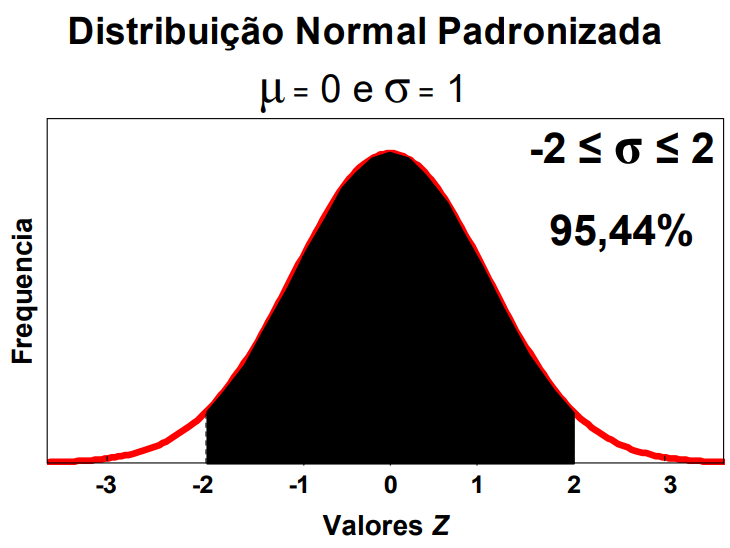


Desse modo, um desvio padrão de 0.5 nos diria que podemos confiar que 95.44% dos nossos erros vão estar entre -1 e +1. Se a nossa média é 13.85, estamos falando de um intervalo de confiança que engloba erros de até 7% pra mais ou pra menos. O que já me parece uma previsão bem assertiva.


In [9]:
df1 = df_taxi.copy()
df1.dropna(inplace=True)
df1

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,ride_date
2,ab1adf76a077d31a82824264aed032f197423f5d,41afbb1073e9c58a6dbdfff8ad24160d01c862ca34c520...,2018-08-24 16:00:00+00:00,2018-08-24 16:45:00+00:00,3180.0,0.9,1.703198e+10,1.703108e+10,76.0,8.0,41.00,9.2,0.0,5.0,55.20,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.907413,-87.640902,POINT (-87.6409015248 41.9074128162),2018-08-24
4,48262d526cc41442f947b81a3ab0f60174fc66cc,11f73b08790612efe341cf8cf69cadbcb7732293794186...,2018-08-10 21:00:00+00:00,2018-08-10 21:00:00+00:00,600.0,1.6,1.703128e+10,1.703108e+10,28.0,8.0,7.50,1.5,0.0,0.0,9.00,Credit Card,Choice Taxi Association,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),2018-08-10
5,f5a6afb4daedb37b82500baf34cf41adcf7ca167,fcff47c0714c3d1a1ee9f6c36ea2854b938fadea98f2b5...,2013-03-01 19:15:00+00:00,2013-03-01 19:30:00+00:00,540.0,18.0,1.703108e+10,1.703108e+10,8.0,8.0,7.65,0.0,0.0,1.0,8.65,Cash,Taxi Affiliation Services,41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),2013-03-01
7,8c7eb6c919ccc5197f9f97255f3eb5cd8ab6a0b1,07588fc5119d1c29249afc3e41417094185f808c12ff3d...,2013-02-22 21:15:00+00:00,2013-02-22 21:30:00+00:00,840.0,0.0,1.703106e+10,1.703103e+10,6.0,77.0,10.25,0.0,0.0,0.0,10.25,Cash,Northwest Management LLC,41.938391,-87.638575,POINT (-87.6385749205 41.938391257700005),41.978875,-87.657871,POINT (-87.6578712629 41.9788750584),2013-02-22
10,f06a3db639297271c4a1f5b3704d5c0790d62620,1c87f263c28aad874e0931b598767aeab2dbb7bbdb89d5...,2018-02-23 13:15:00+00:00,2018-02-23 13:30:00+00:00,1020.0,4.2,1.703184e+10,1.703108e+10,33.0,8.0,14.00,2.0,0.0,0.0,16.00,Credit Card,Choice Taxi Association,41.849247,-87.624135,POINT (-87.6241352979 41.84924675450001),41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),2018-02-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49979,67d56b52bde3b66d747f7b45dfab4b73431e2c2d,af3b4b23f34495cb17ffb1b5ba884c08a6266690661eb2...,2018-03-14 17:15:00+00:00,2018-03-14 17:30:00+00:00,180.0,0.5,1.703184e+10,1.703108e+10,32.0,8.0,4.75,2.0,0.0,0.0,6.75,Credit Card,Star North Management LLC,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),2018-03-14
49980,b953c75c172ea36d7be6b59be1e71307c6ed0c59,926aca65cddbfce7915dde52b9dad1eeba3a34763f280c...,2017-07-19 10:15:00+00:00,2017-07-19 10:30:00+00:00,600.0,0.0,1.703108e+10,1.703108e+10,8.0,8.0,7.50,1.0,0.0,0.0,8.50,Credit Card,Blue Ribbon Taxi Association Inc.,41.905858,-87.630865,POINT (-87.6308650266 41.9058577688),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),2017-07-19
49991,bd399345026e933c8c9720433f3f7ef70ab2f6d3,1d6d1609c02f50bdd45ffcbe08fb36ce7908b2ff08b421...,2014-05-03 01:15:00+00:00,2014-05-03 01:15:00+00:00,240.0,1.5,1.703106e+10,1.703106e+10,6.0,6.0,6.05,0.0,0.0,1.0,7.05,Cash,Dispatch Taxi Affiliation,41.953400,-87.646007,POINT (-87.6460070664 41.9534000435),41.945282,-87.661545,POINT (-87.6615450961 41.9452823311),2014-05-03
49994,2a66652862821235e5a24e9a6dc28e1663c41fcd,519324bbc26a62489bfa3f3d64b74a0e62c7e455ef266b...,2015-08-14 11:45:00+00:00,2015-08-14 12:00:00+00:00,240.0,0.6,1.703184e+10,1.703108e+10,32.0,8.0,4.65,0.0,0.0,0.0,4.65,Cash,Taxi Affiliation Services,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),2015-08-14


In [10]:
for column in df1.columns:
  if df1[column].dtype == 'object':
    le = LabelEncoder()
    df1[column] = le.fit_transform(df1[column])
  
x_train, x_test, y_train, y_test = train_test_split(df1.drop(columns=['trip_total']), df1['trip_total'], train_size=0.7)
regression_model = RandomForestRegressor()
regression_model.fit(x_train, y_train)
y_pred = regression_model.predict(x_test)

error = y_test - y_pred
print('Custo médio da corrida ($): {}'. format(y_test.mean()))
print('Erro médio da previsão ($): {:1.3f}'. format(error.mean()))
print('Desvio padrão do erro ($): {}'. format( np.round(error.std(), 3) ))
print()

n_maiores_erros = 15

print('Maiores erros:')
print(error.sort_values(ascending=False)[:n_maiores_erros])
print()

print('Custo médio (limpo) da corrida ($): {}'. format(y_test.sort_values(ascending=False)[n_maiores_erros:].mean()))
print('Erro médio (limpo) da previsão ($): {}'.format(error.sort_values(ascending=False)[n_maiores_erros:].mean()))
print('Desvio padrão (limpo) do erro ($): {}'.format(error.sort_values(ascending=False)[n_maiores_erros:].std()))

Custo médio da corrida ($): 13.804695009242211
Erro médio da previsão ($): 0.024
Desvio padrão do erro ($): 1.066

Maiores erros:
4504     40.1885
30692    32.7285
22091    26.8900
22109    25.1433
14204    16.6721
39741    12.0555
30408    11.8500
34338    11.4414
10546    10.4201
44364     5.6950
27712     5.2728
18380     5.0315
19221     4.4815
36218     4.3927
6422      3.6810
Name: trip_total, dtype: float64

Custo médio (limpo) da corrida ($): 13.61039061293814
Erro médio (limpo) da previsão ($): -0.009499181719932456
Desvio padrão (limpo) do erro ($): 0.6077956900987911


Essa abordagem de simplesmente jogar fora todas a linhas que tinham ao menos um vampo com dados faltantes custou mais da metade do nosso dataset, mas aparentemente esse segundo modelo traz resultados ligeiramente melhores. Digo aparentemente porque como comentado ali em cima, é necessário um certo cuidado pra comparar valores previstos, mas nesse nosso caso, rodei umas 6 ou 7 vezes e já que em todas, o segundo modelo desempenhou melhor que o primero, vamos aceitar que a melhora é real. 

Um possível problema dessa metodologia de eliminar os registros com dados faltantes é tirar a capacidade do modelo entender registros incompletos na hora de fazer uma previsão de verdade. Se ele nunca viu um registro se informação na coluna company por exemplo, o que ele vai fazer caso isso aconteça em produção?
Fica aí uma análise a ser feita: separar uma porção de dados com valores faltantes em diversas colunas e ver como esse modelo que nunca viu valores nulos vai se comportar.

## Análise exploratória de dados

Se nós pararmos pra ver um pouquinho mais de perto essa nossa base, vamos perceber que de cara, uma coluna não faz diferença nenhuma nos resultados da nossa previsão: unique_key. 
O que um índice pode acescentar de informação pra fazer o modelo acertar o preco das corridas? 
Mais que saber que eliminar o indíce simplifica o modelo sem degradar os resultados, podemos procurar entender quais são as variáveis que mais contribuem para a previsão mais acertada. Isso é a EDA.

In [11]:
# nós poderíamos partir do df1 que é a versão limpa do dataframe, mas é importante saber também como os dados nulos se distribuem
df = df_taxi.copy()

Nessa olhada meio por cima que nós demons nos nosso dados, podem ter surgido algumas dúvidas:

Em que dia da semana acontecem mais corridas? Em que horários? Quais os impactos dessa variação de demanda nos preços das corridas? Existe algum tipo de fluxo de entre regiões nas diversas horas do dia? Quais são as regiôes com mais movimento? E as formas de pagamento preferidas pelo pessoal? Qual a distânica média da corrida? Todas as empresas de táxi têm os mesmo preços? O preço varia de acordo com a região de onde o passageiro sai ou pra onde ele está indo? 

Enfim. O universo de perguntas é bem grande.

De agora em diante, vamos usar um estratégia um pouco diferente: em vez de fazer várias novas versões do dataframe, vamos preservar as colunas originais e adicionar colunas transformadas aos dados. Ao fim do processo pode ser que sejam adicionadas só duas ou três colunas bem como o numero pode tranquilamente 
dobrar ou triplicar, mas não tem problema. Vamos ver que, nesse primeiro momento, fica tudo bem mais prático na hora de usar metodologias de seleção de features.

In [12]:
# selecionando as colunas que contém dados nulos
columns_with_null_values = df.isnull().sum()[df.isnull().sum() > 0].index.values

#for column in columns_with_null_values:
  

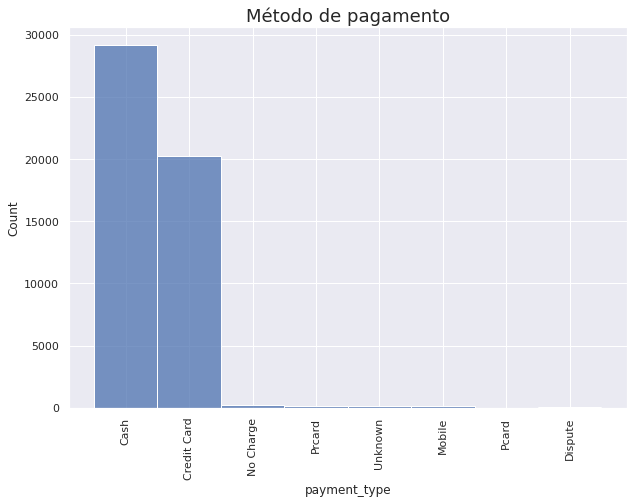

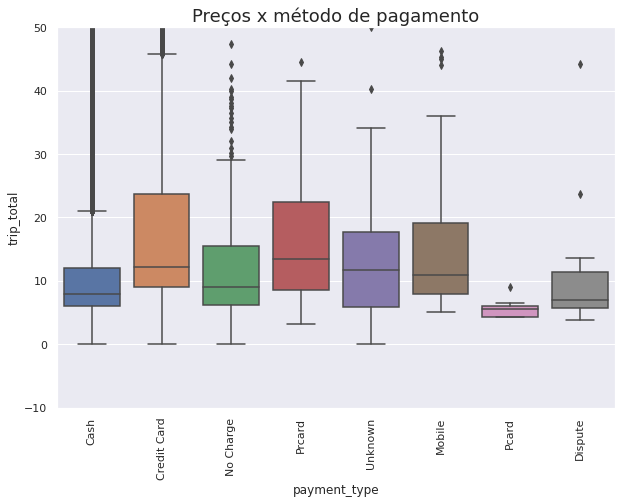


Custo total mediano de corridas pagas com dinheiro: 8.0
Custo total mediano de corridas pagas com crédito: 12.25



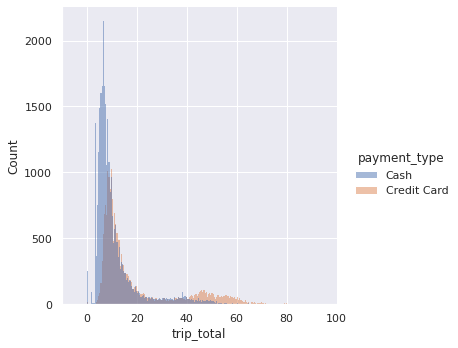

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-whitegrid')
sns.set(rc={'figure.figsize': (10, 7)})

sns.histplot(df['payment_type'])
plt.xticks(rotation=90)
plt.title('Método de pagamento', fontdict={'size': 18})
plt.show()
print()

# vamos ver agora se existem diferenças entre os preços 
plt.style.use('seaborn-whitegrid')
sns.set(rc={'figure.figsize': (10, 7)})

sns.boxplot(x='payment_type', y='trip_total', data=df)
plt.xticks(rotation=90)
plt.title('Preços x método de pagamento', fontdict={'size': 18})
plt.ylim(-10, 50) # tem MUITO outlier no preço, então vamos dar uma limitada no eixo y pra ver um pouco melhor
plt.show()
print()

print("Custo total mediano de corridas pagas com dinheiro: {}".format(df[df['payment_type'] == 'Cash']['trip_total'].median()))
print("Custo total mediano de corridas pagas com crédito: {}".format(df[df['payment_type'] == 'Credit Card']['trip_total'].median()))
print()

# vamos procurar mais uma forma de ver como essas distribuições se comportam
plt.style.use('seaborn-whitegrid')
sns.set(rc={'figure.figsize': (10, 7)})

sns.displot(data=df.loc[(df['payment_type'] == 'Credit Card') | (df['payment_type'] == 'Cash')], x="trip_total", hue="payment_type", kde=False)
plt.xlim(-10, 100)
plt.show()

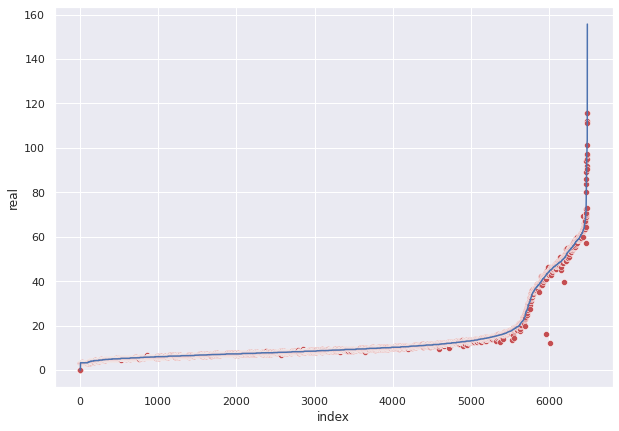

In [14]:
# Também podemos analisar a performance do modelo de uma forma um pouco mais visual
df_plot_results = pd.DataFrame({'pred': y_pred,
                                'real': y_test}).sort_values(by=['real']).reset_index(drop=True) # organizado de forma crescente pra facilitar a visualização

df_plot_results['index'] = df_plot_results.index

sns.lineplot(x='index', y='real', data=df_plot_results) # valores reais como uma linha
sns.scatterplot(x='index', y='pred', data=df_plot_results, color='r') # valores previstos como dispersão
plt.show()